# Imbalanced_Learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from IPython.display import Image
from sklearn.decomposition import PCA

In [2]:
X_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/X_train.txt", header=None,  delim_whitespace=True)
y_train = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/y_train.txt", header=None, delim_whitespace=True )
X_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/X_test.txt", header=None, delim_whitespace=True )
y_test = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/y_test.txt", header=None, delim_whitespace=True )
features = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/features.txt", header=None, delim_whitespace=True )
subject = pd.read_csv("/Users/salvu/Desktop/DM2Git/1Modulo/subject_train.txt", header=None, delim_whitespace=True )

In [3]:
feature = features
subjects = subject
feature.drop(0,inplace=True, axis=1)

In [4]:
#inseriamo l'intestazione al dataset
lista=[]
feat_transpa = feature.transpose()
for i in range(561):
    lista.append(feat_transpa.iloc[0][i])
X_test.columns=lista    
X_train.columns=lista

In [6]:
# eliminiamo le colonne che contengono la stima mad in quanto quasi uguale a dev.std
stringa="mad()"
for col in X_train.columns:
    if(stringa in col):
        X_train.drop(labels=col, axis=1, inplace=True)
for col in X_test.columns:
    if(stringa in col):
        X_test.drop(labels=col, axis=1, inplace=True)        

In [7]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int64),
 array([1226, 1073,  986, 1286, 1374, 1407], dtype=int64))

## Undersampling

In [8]:
#Inseriamo gli indici dei record delle classi da eliminare in una lista
#Best Undersampling in TXA Project

In [9]:
#inserisco in una lista gli indici delle classi che vorremmo togliere; TEST
prova_test1=[]
for i in range(len(y_test)):
    if( y_test.iloc[i][0]== 5 ):
        prova_test1.append(i)
#prova_test        

In [10]:
#inserisco in una lista gli indici delle classi che vorremmo togliere; TEST
prova_test2=[]
for i in range(len(y_test)):
    if( y_test.iloc[i][0]== 2 ):
        prova_test2.append(i)
#prova_test        

In [11]:
#inserisco in una lista gli indici delle classi che vorremmo togliere; TRAIN
prova_train1=[]
for i in range(len(y_train)):
    if(y_train.iloc[i][0]==5 ):
        prova_train1.append(i)
#prova_train     

In [12]:
#inserisco in una lista gli indici delle classi che vorremmo togliere; TRAIN
prova_train2=[]
for i in range(len(y_train)):
    if(y_train.iloc[i][0]== 2):
        prova_train2.append(i)
#prova_train  

In [13]:
y_test1 = pd.Series(prova_test1, copy=False) #5
y_test2 = pd.Series(prova_test2, copy=False) #2
len(y_test1),len(y_test2)

(532, 471)

In [14]:
y_train1 = pd.Series(prova_train1, copy=False)
y_train2 = pd.Series(prova_train2, copy=False)
len(y_train1), len(y_train2)

(1374, 1073)

### leviamo gli indici della classe da sbilanciare nel TRAIN (1/10)

In [15]:
#TRAIN
rows2remove_tr1 = np.random.choice((y_train1), 1374 - 137, replace=False) #1/10
#rows2remove_tr1

In [16]:
rows2remove_tr2 = np.random.choice((y_train2), 1073 - 107, replace=False) #1/10

In [17]:
#unisco i due array in modo da avere un unico array con gli indici delle classi da levare
rows2remove_tr=np.concatenate((rows2remove_tr1, rows2remove_tr2), axis=None)

In [18]:
rows2remove_tr

array([3270, 3254, 1910, ..., 4173, 5861, 3592], dtype=int64)

### Eliminiamo gli indici delle classi da sbilanciare nel TEST (1/10)

In [19]:
#TEST
rows2remove_tes1 = np.random.choice((y_test1), 532 - 53, replace=False) # 1/10

In [20]:
rows2remove_tes2 = np.random.choice((y_test2), 471 - 47, replace=False) # 1/10

In [21]:
rows2remove_tes = np.concatenate((rows2remove_tes1, rows2remove_tes2), axis=None)

### Osserviamo com'è cambiata la distribuzione

In [22]:
X_test_sbilanciato = X_test.drop(rows2remove_tes, axis=0)
y_test_sbilanciato = y_test.drop(rows2remove_tes, axis=0)

X_train_sbilanciato = X_train.drop(rows2remove_tr, axis=0)
y_train_sbilanciato = y_train.drop(rows2remove_tr, axis=0)



In [23]:
#Originale
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([1, 2, 3, 4, 5, 6], dtype=int64),
  array([1226, 1073,  986, 1286, 1374, 1407], dtype=int64)),
 (array([1, 2, 3, 4, 5, 6], dtype=int64),
  array([496, 471, 420, 491, 532, 537], dtype=int64)))

In [24]:
#Sbilanciato
np.unique(y_train_sbilanciato, return_counts=True), np.unique(y_test_sbilanciato, return_counts=True)

((array([1, 2, 3, 4, 5, 6], dtype=int64),
  array([1226,  107,  986, 1286,  137, 1407], dtype=int64)),
 (array([1, 2, 3, 4, 5, 6], dtype=int64),
  array([496,  47, 420, 491,  53, 537], dtype=int64)))

## Classification

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### DecisionTree

In [27]:
param_list = {'max_depth': [None],    
             'min_samples_split': [2, 4, 5, 10, 20],
             'min_samples_leaf': [1, 4, 5, 10, 20], 
             'criterion': [ 'entropy']
             }

In [28]:
clf_search = DecisionTreeClassifier() 
clf_search.fit(X_train_sbilanciato, y_train_sbilanciato)

DecisionTreeClassifier()

In [29]:
grid_search = GridSearchCV(clf_search, param_grid=param_list)
grid_search.fit(X_train_sbilanciato, y_train_sbilanciato) ##### ASK !!
res = grid_search.cv_results_

In [30]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [31]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_sbilanciato, y_train_sbilanciato)
y_pred0 = clf.predict(X_test_sbilanciato)

print('Accuracy %s' % accuracy_score(y_test_sbilanciato, y_pred0))
print('F1-score %s' % f1_score(y_test_sbilanciato, y_pred0, average=None))
print(classification_report(y_test_sbilanciato, y_pred0))

Accuracy 0.913894324853229
F1-score [0.93440969 0.45454545 0.90424242 0.92094017 0.51315789 1.        ]
              precision    recall  f1-score   support

           1       0.94      0.93      0.93       496
           2       0.40      0.53      0.45        47
           3       0.92      0.89      0.90       420
           4       0.97      0.88      0.92       491
           5       0.39      0.74      0.51        53
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2044
   macro avg       0.77      0.83      0.79      2044
weighted avg       0.93      0.91      0.92      2044



### KNN

Minimum error:- 0.07093933463796477 at K = 2


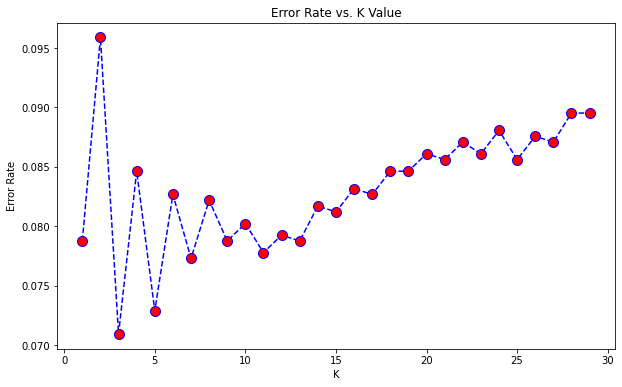

In [32]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sbilanciato,y_train_sbilanciato.values.ravel())
    pred_i = knn.predict(X_test_sbilanciato)
    error_rate.append(np.mean(pred_i != np.ravel(y_test_sbilanciato)))
#print(pred_i)
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [33]:
clf_knn = KNeighborsClassifier(n_neighbors=17, weights='uniform') # 26 vicini
clf_knn.fit(X_train_sbilanciato, np.ravel(y_train_sbilanciato)) #df3
y_pred_knn = clf_knn.predict(X_test_sbilanciato)

In [34]:
print('Accuracy %s' % accuracy_score(y_test_sbilanciato, y_pred_knn))
print('F1-score %s' % f1_score(y_test_sbilanciato, y_pred_knn, average=None))
print(classification_report(y_test_sbilanciato, y_pred_knn))

Accuracy 0.9173189823874756
F1-score [0.90055249 0.46376812 0.88745149 0.94757282 0.10714286 0.9981378 ]
              precision    recall  f1-score   support

           1       0.83      0.99      0.90       496
           2       0.73      0.34      0.46        47
           3       0.97      0.82      0.89       420
           4       0.91      0.99      0.95       491
           5       1.00      0.06      0.11        53
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2044
   macro avg       0.91      0.70      0.72      2044
weighted avg       0.92      0.92      0.90      2044



## OutOfProject

### RandomUnderSampler

In [35]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

In [36]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1})


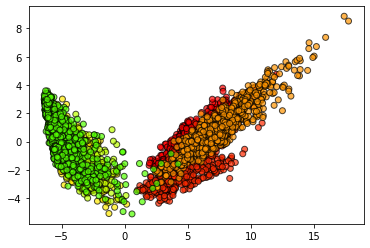

In [37]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [38]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8663047166610112
F1-score [0.87063267 0.7954023  0.86153846 0.81419624 0.83639706 1.        ]
              precision    recall  f1-score   support

           1       0.82      0.93      0.87       496
           2       0.87      0.73      0.80       471
           3       0.86      0.87      0.86       420
           4       0.84      0.79      0.81       491
           5       0.82      0.86      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.86      0.86      2947
weighted avg       0.87      0.87      0.87      2947



### CondensedNearestNeighbour

In [42]:
import warnings
warnings.simplefilter("ignore")

In [43]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1})


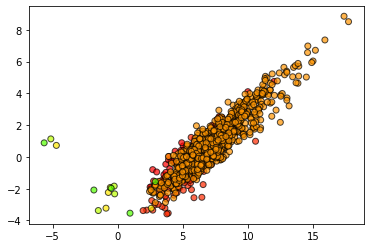

In [44]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [45]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5130641330166271
F1-score [0.72268908 0.61896552 0.67157314 0.14480874 0.51338583 0.18759019]
              precision    recall  f1-score   support

           1       0.75      0.69      0.72       496
           2       0.52      0.76      0.62       471
           3       0.55      0.87      0.67       420
           4       0.22      0.11      0.14       491
           5       0.44      0.61      0.51       532
           6       0.42      0.12      0.19       537

    accuracy                           0.51      2947
   macro avg       0.48      0.53      0.48      2947
weighted avg       0.48      0.51      0.47      2947



## Oversampling

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### RandomOverSampler

In [47]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1})


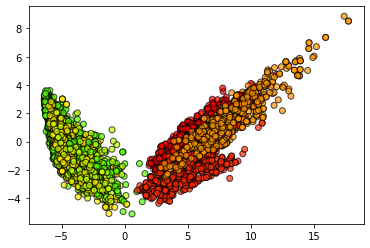

In [48]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [50]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8744485917882593
F1-score [0.88380952 0.8198895  0.85958486 0.82105263 0.84489051 1.        ]
              precision    recall  f1-score   support

           1       0.84      0.94      0.88       496
           2       0.85      0.79      0.82       471
           3       0.88      0.84      0.86       420
           4       0.85      0.79      0.82       491
           5       0.82      0.87      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



### SMOTE

In [51]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1})


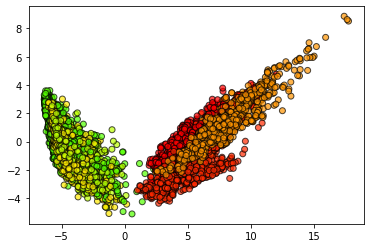

In [52]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [53]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8608754665761792
F1-score [0.87733072 0.77936334 0.82227488 0.81740977 0.8442029  1.        ]
              precision    recall  f1-score   support

           1       0.85      0.90      0.88       496
           2       0.81      0.75      0.78       471
           3       0.82      0.83      0.82       420
           4       0.85      0.78      0.82       491
           5       0.81      0.88      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947

